In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile

In [2]:
def blackman_harris_window(N):
    """
    Create a Blackman-Harris Window
     
    Parameters
    ----------
    N: int
        Length of window
     
    Returns
    -------
    ndarray(N): Samples of the window
    """
    a0 = 0.35875
    a1 = 0.48829
    a2 = 0.14128
    a3 = 0.01168
    t = np.arange(N)/N
    return a0 - a1*np.cos(2*np.pi*t) + a2*np.cos(4*np.pi*t) - a3*np.cos(6*np.pi*t)
 
def stft(x, w, h, win_fn=blackman_harris_window):
    """
    Compute the complex Short-Time Fourier Transform (STFT)
    Parameters
    ----------
    x: ndarray(N)
        Full audio clip of N samples
    w: int
        Window length
    h: int
        Hop length
    win_fn: int -> ndarray(N)
        Window function
     
    Returns
    -------
    ndarray(w, nwindows, dtype=np.complex) STFT
    """
    N = len(x)
    nwin = int(np.ceil((N-w)/h))+1
    # Make a 2D array
    # The rows correspond to frequency bins
    # The columns correspond to windows moved forward in time
    S = np.zeros((w, nwin), dtype=complex)
    # Loop through all of the windows, and put the fourier
    # transform amplitudes of each window in its own column
    for j in range(nwin):
        # Pull out the audio in the jth window
        xj = x[h*j:h*j+w]
        # Zeropad if necessary
        if len(xj) < w:
            xj = np.concatenate((xj, np.zeros(w-len(xj))))
        # Apply window function
        xj = win_fn(w)*xj
        # Put the fourier transform into S
        S[:, j] = np.fft.fft(xj)
    return S
 
def amplitude_to_db(S, amin=1e-10, ref=1):
    """
    Convert an amplitude spectrogram to be expressed in decibels
     
    Parameters
    ----------
    S: ndarray(win, T)
        Amplitude spectrogram
    amin: float
        Minimum accepted value for the spectrogram
    ref: int
        0dB reference amplitude
         
    Returns
    -------
    ndarray(win, T)
        The dB spectrogram
    """
    SLog = 20.0*np.log10(np.maximum(amin, S))
    SLog -= 20.0*np.log10(np.maximum(amin, ref))
    return SLog
 

(0.0, 512.0)

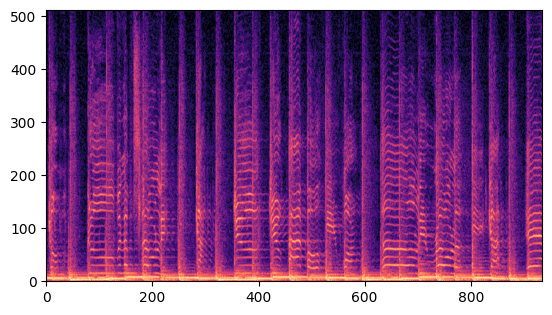

In [3]:
sr, x = wavfile.read("beatles.wav")
x = x/32768.0
win = 2048
hop = 512
S = stft(x, win, hop)
Sdb = amplitude_to_db(np.abs(S), ref=1, amin=1e-2)
plt.imshow(Sdb, cmap='magma')
plt.ylim([0, 512])

## Autocorrelation

1. Create an array of zeros of length 2*len(diff) and put diff in the first half of this to zeropad (this makes sure the convolution will have enough space)
2. Compute the DFT of this array
3. Take the inverse DFT of the magnitude squared of this DFT


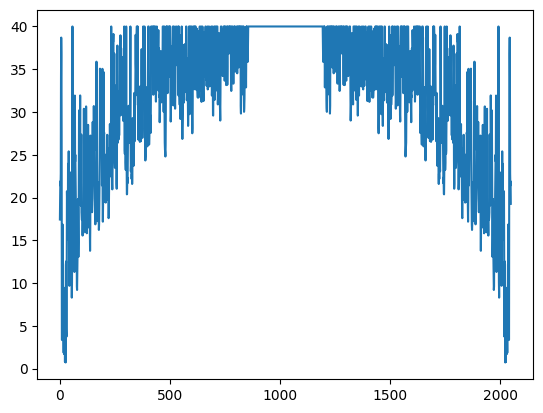

In [4]:
plt.plot(np.abs(Sdb[:,0]))

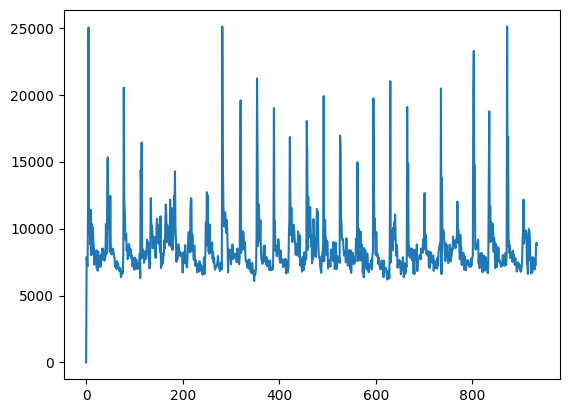

In [5]:
diff = np.zeros(Sdb.shape[1]) # Make an array with as many elements as columns of Sdb
for j in range(1, Sdb.shape[1]):
    last_col = Sdb[:, j-1]
    col = Sdb[:, j]
    diff[j] = np.sum(np.abs(col - last_col))

plt.plot(diff)

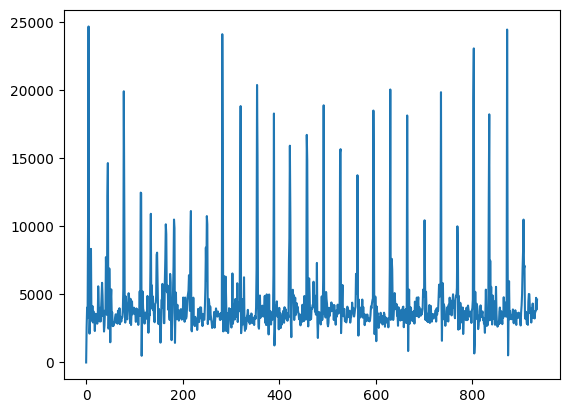

In [6]:
diff = np.zeros(Sdb.shape[1]) # Make an array with as many elements as columns of Sdb
for j in range(1, Sdb.shape[1]):
    last_col = Sdb[:, j-1]
    col = Sdb[:, j]
    diff[j] = np.sum((col - last_col)*(col > last_col))

plt.plot(diff)

(0.0, 512.0)

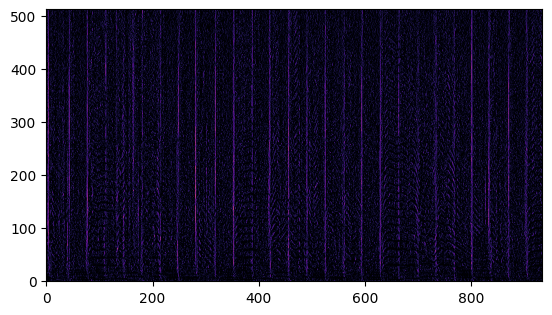

In [7]:
diff = Sdb[:, 1::] - Sdb[:, 0:-1]
diff[diff < 0] = 0
plt.imshow(diff, cmap='magma')
plt.ylim([0,512])

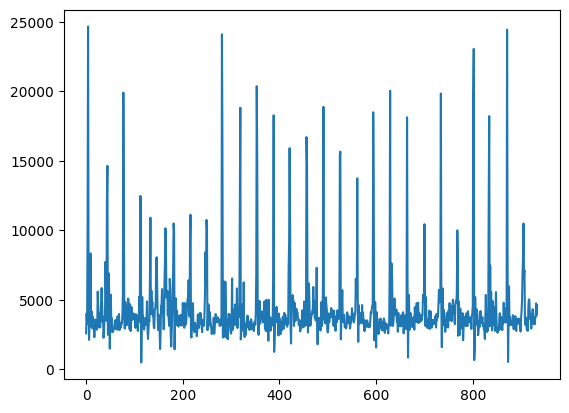

In [8]:
diff = np.sum(diff, axis=0)
plt.plot(diff)

In [9]:
print("len audio", len(x))
print("len diff:", len(diff))

len audio 480000
len diff: 934


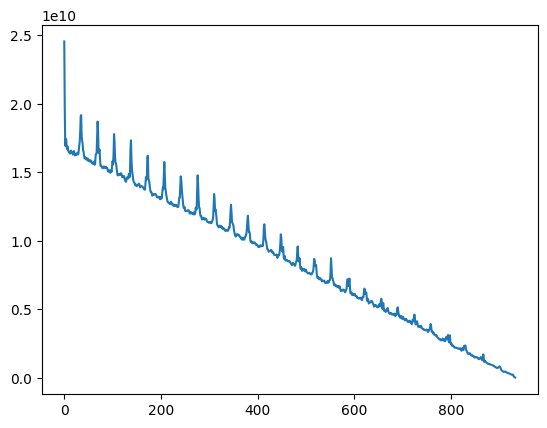

In [10]:
N = len(diff)
diff = np.concatenate((diff, np.zeros(N)))
X = np.fft.fft(diff)
X = np.abs(X)**2
xauto = np.fft.ifft(X)
xauto = xauto[0:N]
xauto = np.real(xauto)
plt.plot(xauto)

In [13]:
print(xauto[0])

24556463519.169235
